In [44]:
from imutils import paths
import cv2 
imagepaths= list(paths.list_images("C:\Bone Fracture"))

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Define a data generator for image preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=20,  # Data augmentation options
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Use the data generator to load and preprocess images in batches
batch_size = 32  # Define your batch size

train_generator = datagen.flow_from_directory(
    "C:/Bone Fracture/train",
    target_size=(224, 224),  # Adjust target size to match your model's input size
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multiple classes
    shuffle=True
)

# Optionally, convert the generator's class indices to one-hot encoded labels
y_train = to_categorical(train_generator.classes)

# Display the number of samples and classes
print("Total samples:", train_generator.samples)
print("Total classes:", train_generator.num_classes)

Found 8863 images belonging to 2 classes.
Total samples: 8863
Total classes: 2


In [46]:
imagepaths

['C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated1-rotated1.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated1-rotated2.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated1-rotated3.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated1.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated2-rotated1.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated2-rotated2.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated2-rotated3.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated2.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated3-rotated1.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated3-rotated2.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated3-rotated3.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1-rotated3.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated1.jpg',
 'C:\\Bone Fracture\\test\\fractured\\13-rotated2-rotated1-rotated1.jpg',
 'C:\\Bon

In [47]:
import os
from collections import Counter

# Getting the size of the image dataset
dataset_size = 0
for root, dirs, files in os.walk('C:\Bone Fracture'):
    for file in files:
        dataset_size += os.path.getsize(os.path.join(root, file))

# Getting the number of classes in the image dataset
classes = Counter()
for root, dirs, files in os.walk('C:\Bone Fracture'):
    for file in files:
        classes[os.path.basename(root)] += 1

# Getting the number of samples in the image dataset
num_samples = 0
for class_name, count in classes.items():
    num_samples += count

# Print the size, number of classes, and number of samples
print('Dataset size:', dataset_size)
print('Number of classes:', len(classes))
print('Number of samples:', num_samples)

Dataset size: 182284727
Number of classes: 2
Number of samples: 9463


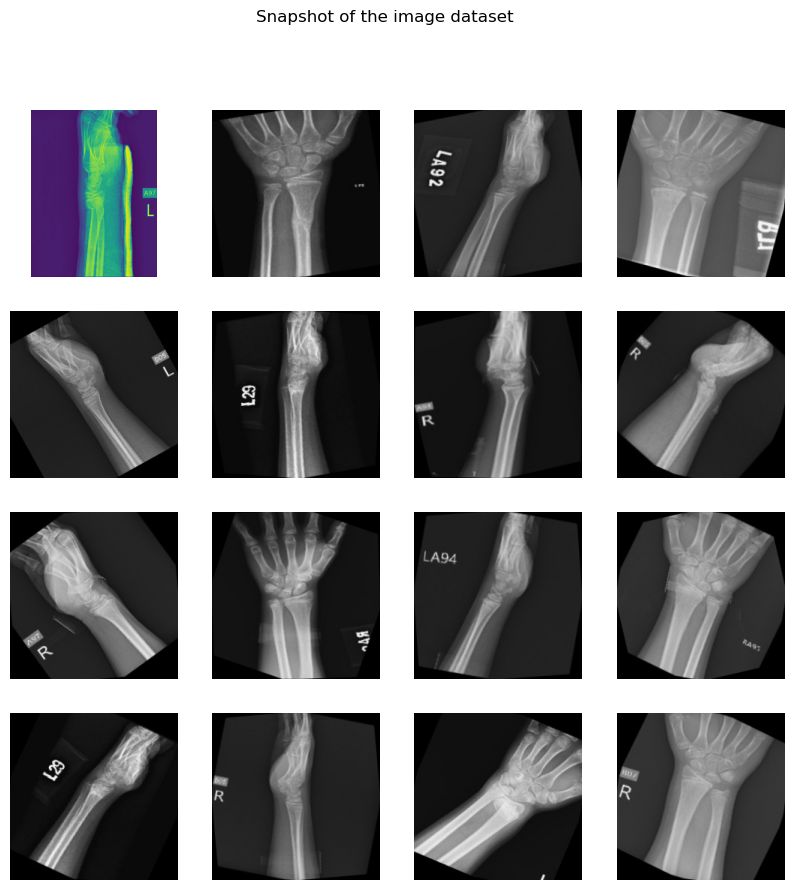

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Loading a random sample of images from the dataset
image_paths = []
for root, dirs, files in os.walk('C:\Bone Fracture'):
    for file in files:
        image_paths.append(os.path.join(root, file))

np.random.shuffle(image_paths)

# Displaying a grid of the images
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(16):
    axs[i // 4, i % 4].imshow(plt.imread(image_paths[i]))
    axs[i // 4, i % 4].axis('off')

plt.suptitle('Snapshot of the image dataset')
plt.show()

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Defining a data generator for image preprocessing

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=20,  # Data augmentation options
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Using the data generator to load and preprocess images in batches

batch_size = 32  # Define your batch size

train_generator = datagen.flow_from_directory(
    "C:/Bone Fracture/train",
    target_size=(224, 224),  # Adjusting the  target size to match the model's input size
    batch_size=batch_size,
    class_mode='categorical',  # Using 'categorical' for multiple classes
    shuffle=True
)

# Convert the generator's class indices to one-hot encoded labels

y_train = to_categorical(train_generator.classes)

# Creating a separate validation generator
validation_generator = datagen.flow_from_directory(
    "C:/Bone Fracture/val",
    target_size=(224, 224),  # Adjusting the  target size to match the model's input size
    batch_size=batch_size,
    class_mode='categorical',  # Using 'categorical' for multiple classes
    shuffle=False  # Validation data should not be shuffled
)

# Converting the generator's class indices to one-hot encoded labels
y_val = to_categorical(validation_generator.classes)

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [50]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Loading the pre-trained ResNet-50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adding custom top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification, so 1 output unit with sigmoid activation

# Creating a new model with the modified top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freezing the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


datagen = ImageDataGenerator(
    rescale=1.0/255.0, # Normalize pixel values
    rotation_range=20, # Data augmentation options
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Using data generator to load and preprocess images in batches

batch_size = 32 # Defining batch size

train_generator = datagen.flow_from_directory(
    "C:/Bone Fracture/train",
    target_size=(224, 224), # Adjusting the target size to match the model's input size
    batch_size=batch_size,
    class_mode='categorical', # Using 'categorical' for multiple classes
    shuffle=True
)

# Converting the generator's class indices to one-hot encoded labels

y_train = to_categorical(train_generator.classes)

# Creating a separate validation generator

validation_generator = datagen.flow_from_directory(
    "C:/Bone Fracture/val",
    target_size=(224, 224), # Adjust target size to match the model's input size
    batch_size=batch_size,
    class_mode='categorical', # Using 'categorical' for multiple classes
    shuffle=False # Validation data should not be shuffled
)

# Converting the generator's class indices to one-hot encoded labels

y_val = to_categorical(validation_generator.classes)

# Training the model

model.fit(train_generator, epochs=10, validation_data=validation_generator)

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/10
277/277 [==============================] - 938s 3s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
277/277 [==============================] - 3450s 12s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
277/277 [==============================] - 1348s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
277/277 [==============================] - 1426s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
277/277 [==============================] - 2686s 10s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
277/277 [==============================] - 1364s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
277/277 [==============================] 

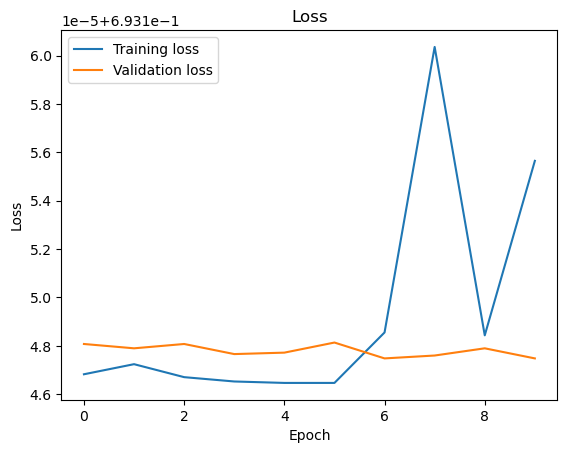

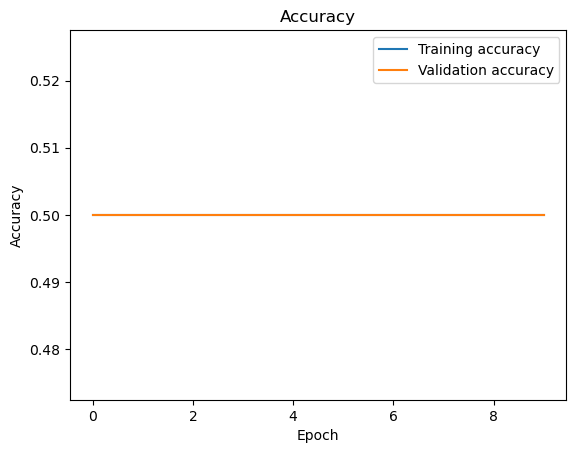

In [31]:
import matplotlib.pyplot as plt


# Get the training and validation loss and accuracy from the model
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']

# Plot the loss graph
plt.figure()
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Plot the accuracy graph
plt.figure()
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [39]:
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Record the start time
start_time = time.time()

# Training the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Record the end time
end_time = time.time()

# Calculate the total training time
training_time = end_time - start_time

# Calculate the average time spent on each epoch
average_epoch_time = training_time / 10 

# Print the results
print("Total training time: {:.2f} seconds".format(training_time))
print("Average time per epoch: {:.2f} seconds".format(average_epoch_time))

Epoch 1/10
277/277 [==============================] - 1349s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
277/277 [==============================] - 1360s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
277/277 [==============================] - 1422s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
277/277 [==============================] - 1291s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
277/277 [==============================] - 1418s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
277/277 [==============================] - 1785s 6s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
277/277 [==============================] - 1535s 6s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy:

In [42]:
validation_generator = datagen.flow_from_directory(
    "C:/Bone Fracture/val",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Converting the generator's class indices to one-hot encoded labels
y_val = to_categorical(validation_generator.classes)


Found 600 images belonging to 2 classes.


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


# Predict the validation data
y_pred = model.predict(validation_generator)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert predicted probabilities to binary labels (0 or 1)

# Extract the true labels from 'y_val'
y_true = np.argmax(y_val, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

19/19 [==============================] - 61s 3s/step
Confusion Matrix:
[[  0 360]
 [  0 240]]
Accuracy: 0.40
Precision: 0.40
Recall: 1.00


In [10]:
from tensorflow.keras.applications.vgg16 import VGG16

In [11]:
base_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 23s 0us/step


In [12]:
predictions = Dense(2, activation='softmax')(base_model.output)

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    shear_range=0.05,
    horizontal_flip=True
)

In [18]:
train_generator = datagen.flow_from_directory(
    "C:/Bone Fracture/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 8863 images belonging to 2 classes.


In [23]:
validation_generator = datagen.flow_from_directory(
    "C:/Bone Fracture/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 600 images belonging to 2 classes.


In [25]:
validation_size = 200  # Assuming 200 validation samples

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

# Define the data augmentation generators
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    shear_range=0.05,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator()

# Load the VGG16 pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add additional layers for bone fracture detection
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(2, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
train_generator = train_datagen.flow_from_directory(
    "C:/Bone Fracture/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    "C:/Bone Fracture/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_size // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_size // batch_size
)

# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate_generator(
    validation_generator, steps=validation_size // batch_size)

print('Validation loss:', validation_loss)
print('Validation accuracy:', validation_accuracy)

# Save the trained model
model.save('bone_fracture_detection_model.h5')

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


C:\Users\zarri\AppData\Local\Temp\ipykernel_15604\485041773.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
25/25 [==============================] - 269s 11s/step - loss: 7.9050 - accuracy: 0.5507 - val_loss: 2.8928 - val_accuracy: 0.2031
Epoch 2/10
25/25 [==============================] - 269s 11s/step - loss: 0.7650 - accuracy: 0.5987 - val_loss: 0.5869 - val_accuracy: 0.9531
Epoch 3/10
25/25 [==============================] - 304s 12s/step - loss: 0.6058 - accuracy: 0.6087 - val_loss: 0.4218 - val_accuracy: 0.9635
Epoch 4/10
25/25 [==============================] - 421s 17s/step - loss: 0.5777 - accuracy: 0.7013 - val_loss: 0.5370 - val_accuracy: 0.5677
Epoch 5/10
25/25 [==============================] - 419s 17s/step - loss: 0.5697 - accuracy: 0.6938 - val_loss: 0.4224 - val_accuracy: 0.8229
Epoch 6/10
25/25 [==============================] - 417s 17s/step - loss: 0.5441 - accuracy: 0.7575 - val_loss: 0.4187 - val_accuracy: 0.7292
Epoch 7/10
25/25 [==============================] - 438s 18s/step - loss: 0.4778 - accuracy: 0.7613 - val_loss: 0.4697 - val_accuracy: 0.7292
Epoch 

C:\Users\zarri\AppData\Local\Temp\ipykernel_15604\485041773.py:64: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_loss, validation_accuracy = model.evaluate_generator(


Validation loss: 0.4323942959308624
Validation accuracy: 0.7395833134651184


F:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from tensorflow.keras.applications import VGG16

model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

total_params = model.count_params()
print('Total number of parameters:', total_params)

Total number of parameters: 14714688


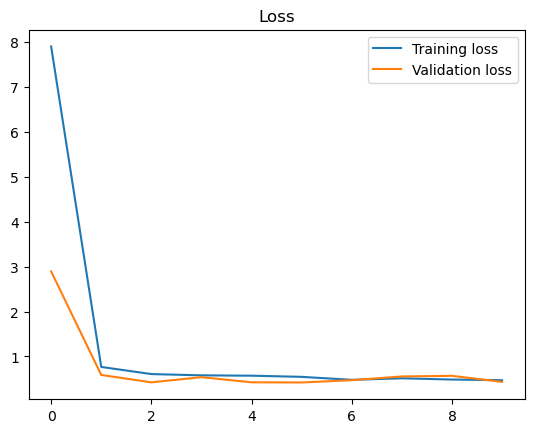

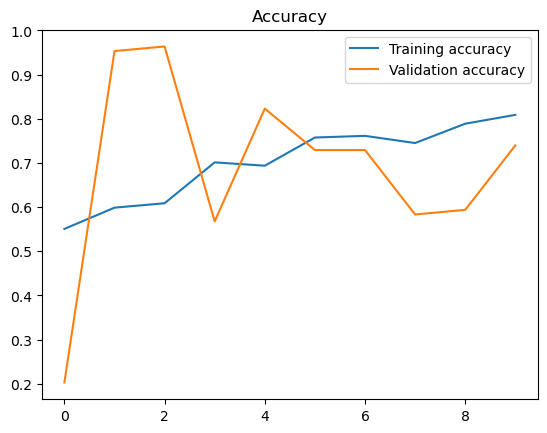

In [37]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()